In [1]:
import torch, torchvision
from torch.utils.data import TensorDataset, DataLoader

In [2]:
train = torchvision.datasets.MNIST(root="../data", train=True, download=True, transform=torchvision.transforms.ToTensor())
train_loader = DataLoader(train, batch_size=64, shuffle=True)


In [3]:
import torch.nn as nn
import torch.optim as optim

In [4]:
import matplotlib.pyplot as plt

In [5]:
train[0][1]

5

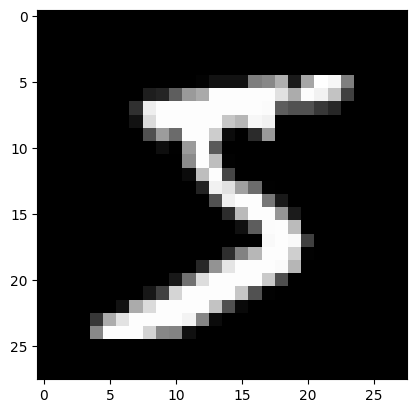

In [6]:
plt.imshow(train[0][0][0, :, :], cmap="gray")

In [7]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10)
)

In [8]:
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=10, bias=True)
)

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
for epoch in range(15):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        print(labels)
        break
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

tensor([6, 2, 9, 3, 7, 7, 9, 5, 9, 1, 3, 9, 7, 7, 3, 3, 5, 9, 2, 3, 8, 9, 8, 1,
        5, 3, 8, 1, 9, 5, 9, 3, 7, 4, 3, 2, 2, 8, 9, 7, 2, 1, 2, 4, 8, 6, 2, 1,
        9, 9, 1, 0, 9, 8, 9, 1, 2, 6, 7, 5, 2, 9, 0, 0])
Epoch 1, Loss: 0.0000
tensor([9, 2, 1, 5, 7, 5, 0, 6, 8, 9, 1, 8, 7, 1, 6, 6, 2, 0, 5, 3, 1, 3, 4, 2,
        0, 1, 4, 2, 2, 0, 8, 8, 0, 4, 1, 5, 0, 6, 2, 1, 7, 9, 2, 6, 3, 1, 0, 9,
        4, 8, 2, 5, 6, 2, 3, 9, 2, 2, 9, 1, 5, 7, 9, 6])
Epoch 2, Loss: 0.0000
tensor([1, 9, 9, 7, 8, 8, 0, 5, 8, 2, 9, 0, 9, 1, 5, 5, 3, 4, 5, 1, 9, 5, 6, 1,
        7, 1, 0, 1, 0, 2, 3, 5, 5, 7, 9, 3, 3, 7, 2, 3, 0, 6, 7, 4, 4, 2, 4, 8,
        8, 6, 6, 5, 0, 8, 9, 0, 8, 6, 9, 9, 7, 6, 5, 2])
Epoch 3, Loss: 0.0000
tensor([9, 9, 9, 6, 1, 2, 3, 3, 6, 9, 7, 1, 9, 5, 0, 1, 3, 3, 9, 7, 7, 2, 1, 0,
        4, 5, 0, 8, 0, 9, 8, 9, 7, 7, 6, 1, 9, 6, 8, 9, 0, 5, 1, 6, 8, 2, 3, 5,
        6, 4, 0, 0, 7, 3, 2, 1, 7, 4, 6, 6, 2, 3, 8, 8])
Epoch 4, Loss: 0.0000
tensor([3, 5, 5, 9, 0, 2, 1, 2, 8, 9, 4, 6, 

In [11]:
torch.save(model.state_dict(), "../data/models/mnist_model.pth")